# ETL

In [19]:
import pandas as pd
import numpy as np

ruta = r"C:\Users\Roger Saavedra\Desktop\Maestria Cienca de Datos\Proyecto Ruben\VENTAS_2024_2025_PROCESADO.xlsx"
df = pd.read_excel(ruta)
df.head(10)

,FECHA,FACTURA,CLIENTE,VENDEDOR,ARTICULO,PROVEEDOR,CANTIDAD,UNIDAD DE VENTA,PRECIO UNITARIO,TOTAL VENTA,COSTO UNITARIO,COSTO TOTAL
0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-07-01 00:00:00,2.0,1,1,1,1,8.00,BUL,26.00,207.96,21.39,171.12
2,2024-07-01 00:00:00,2.0,1,1,2,1,5.00,UND,9.09,45.47,1.33,6.65
3,2024-07-01 00:00:00,3.0,2,2,3,2,1.00,BUL,45.95,45.95,38.47,38.47
4,2024-07-01 00:00:00,3.0,2,2,4,2,1.00,BUL,101.07,101.07,84.59,84.59
5,2024-07-01 00:00:00,3.0,2,2,5,2,2.00,BUL,18.32,36.64,15.34,30.68
6,2024-07-01 00:00:00,3.0,2,2,6,2,1.00,BUL,18.25,18.25,15.27,15.27
7,2024-07-01 00:00:00,3.0,2,2,7,3,1.00,BUL,23.15,23.15,19.68,19.68
8,2024-07-01 00:00:00,3.0,2,2,8,3,0.50,BUL,22.59,11.30,19.20,9.60
9,2024-07-01 00:00:00,3.0,2,2,9,3,0.25,BUL,22.59,5.65,19.20,4.80


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FECHA            34144 non-null  object 
 1   FACTURA          34143 non-null  float64
 2   CLIENTE          34146 non-null  int64  
 3   VENDEDOR         34146 non-null  int64  
 4   ARTICULO         34146 non-null  int64  
 5   PROVEEDOR        34146 non-null  int64  
 6   CANTIDAD         34144 non-null  float64
 7   UNIDAD DE VENTA  34143 non-null  object 
 8   PRECIO UNITARIO  34143 non-null  float64
 9   TOTAL VENTA      34143 non-null  float64
 10  COSTO UNITARIO   34143 non-null  float64
 11  COSTO TOTAL      34143 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 3.1+ MB


In [21]:
df.isnull().sum()

FECHA              2
FACTURA            3
CLIENTE            0
VENDEDOR           0
ARTICULO           0
PROVEEDOR          0
CANTIDAD           2
UNIDAD DE VENTA    3
PRECIO UNITARIO    3
TOTAL VENTA        3
COSTO UNITARIO     3
COSTO TOTAL        3
dtype: int64

In [22]:
# Los valores nulas son por el formato de excel por eso drop
df = df.dropna()

In [23]:
# Cambio el formato fecha a datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])
df.head()

,FECHA,FACTURA,CLIENTE,VENDEDOR,ARTICULO,PROVEEDOR,CANTIDAD,UNIDAD DE VENTA,PRECIO UNITARIO,TOTAL VENTA,COSTO UNITARIO,COSTO TOTAL
1,2024-07-01,2.0,1,1,1,1,8.0,BUL,26.00,207.96,21.39,171.12
2,2024-07-01,2.0,1,1,2,1,5.0,UND,9.09,45.47,1.33,6.65
3,2024-07-01,3.0,2,2,3,2,1.0,BUL,45.95,45.95,38.47,38.47
4,2024-07-01,3.0,2,2,4,2,1.0,BUL,101.07,101.07,84.59,84.59
5,2024-07-01,3.0,2,2,5,2,2.0,BUL,18.32,36.64,15.34,30.68


# EDA

In [24]:
df_ventas = df.copy()

In [25]:
# Rentabilidades
df_ventas['RENTABILIDAD BRUTA'] = df_ventas['TOTAL VENTA'] - df_ventas['COSTO TOTAL']
df_ventas['MARGEN RENTABILIDAD'] = df_ventas['RENTABILIDAD BRUTA'] / df_ventas['TOTAL VENTA'] * 100
df_ventas.tail(10)

,FECHA,FACTURA,CLIENTE,VENDEDOR,ARTICULO,PROVEEDOR,CANTIDAD,UNIDAD DE VENTA,PRECIO UNITARIO,TOTAL VENTA,COSTO UNITARIO,COSTO TOTAL,RENTABILIDAD BRUTA,MARGEN RENTABILIDAD
34134,2025-02-20,11105.0,208,5,305,8,1.00,EMP,2.75,2.75,2.20,2.20,0.55,20.000000
34135,2025-02-20,11105.0,208,5,263,8,1.00,EMP,2.75,2.75,2.20,2.20,0.55,20.000000
34136,2025-02-20,11105.0,208,5,264,8,1.00,EMP,2.75,2.75,2.20,2.20,0.55,20.000000
34137,2025-02-20,11105.0,208,5,265,8,1.00,EMP,2.75,2.75,2.20,2.20,0.55,20.000000
34138,2025-02-20,11105.0,208,5,266,8,1.00,EMP,2.75,2.75,2.20,2.20,0.55,20.000000
34139,2025-02-20,11105.0,208,5,22,5,6.00,BUL,11.10,66.60,8.99,53.94,12.66,19.009009
34140,2025-02-20,11106.0,582,4,9,3,0.25,BUL,25.19,6.30,20.40,5.10,1.20,19.047619
34141,2025-02-20,11106.0,582,4,254,3,0.25,BUL,31.70,7.93,25.68,6.42,1.51,19.041614
34142,2025-02-20,11107.0,646,2,164,4,1.00,BUL,14.61,14.61,12.15,12.15,2.46,16.837782
34143,2025-02-20,11108.0,646,2,16,2,2.00,BUL,36.00,72.00,30.75,61.50,10.50,14.583333


In [26]:
# KPI'S

# Venta Total
venta_total = df_ventas['TOTAL VENTA'].sum()
print(f'Las ventas son: ${venta_total:,.2f}')

# Rentabilidad Total
rentabilidad_total = df_ventas['RENTABILIDAD BRUTA'].sum()
print(f'La rentabilidad bruta es: ${rentabilidad_total:,.2f}')

# Numero Clientes Alcanzados
num_clientes = df_ventas['CLIENTE'].nunique()
print(f"Número de clientes diferentes: {num_clientes}")

# Numero Articulos Vendidos
num_articulos = df_ventas['ARTICULO'].nunique()
print(f"Número de productos diferentes vendidos: {num_articulos}")

# Numero Proveedores
num_proveedores = df_ventas['PROVEEDOR'].nunique()
print(f"Número de proveedores diferentes utilizados: {num_proveedores}")

# Promedio Margen de Ganancia por Producto
ganancia_prom = df_ventas['MARGEN RENTABILIDAD'].mean()
print(f"El promedio de ganancia por producto es %: {ganancia_prom:,.2f}")

# Factura Promedio
factura_promedio = df_ventas.groupby('FACTURA')['TOTAL VENTA'].sum().mean()
print(f"El valor promedio de una factura es: ${factura_promedio:,.2f}")

# Productos Distintos por Factura Promedio
productos_distintos_por_factura = df_ventas.groupby('FACTURA')['ARTICULO'].nunique().mean()
print(f"En promedio, cada factura contiene {productos_distintos_por_factura:.2f} productos distintos.")

# Cantidad Total Comprada por Factura
cantidad_promedio_por_factura = df_ventas.groupby('FACTURA')['CANTIDAD'].sum().mean()
print(f"En promedio, cada factura contiene {cantidad_promedio_por_factura:.2f} unidades de productos.")

Las ventas son: $1,312,512.48
La rentabilidad bruta es: $204,015.00
Número de clientes diferentes: 1176
Número de productos diferentes vendidos: 305
Número de proveedores diferentes utilizados: 11
El promedio de ganancia por producto es %: 16.90
El valor promedio de una factura es: $121.29
En promedio, cada factura contiene 3.15 productos distintos.
En promedio, cada factura contiene 5.52 unidades de productos.


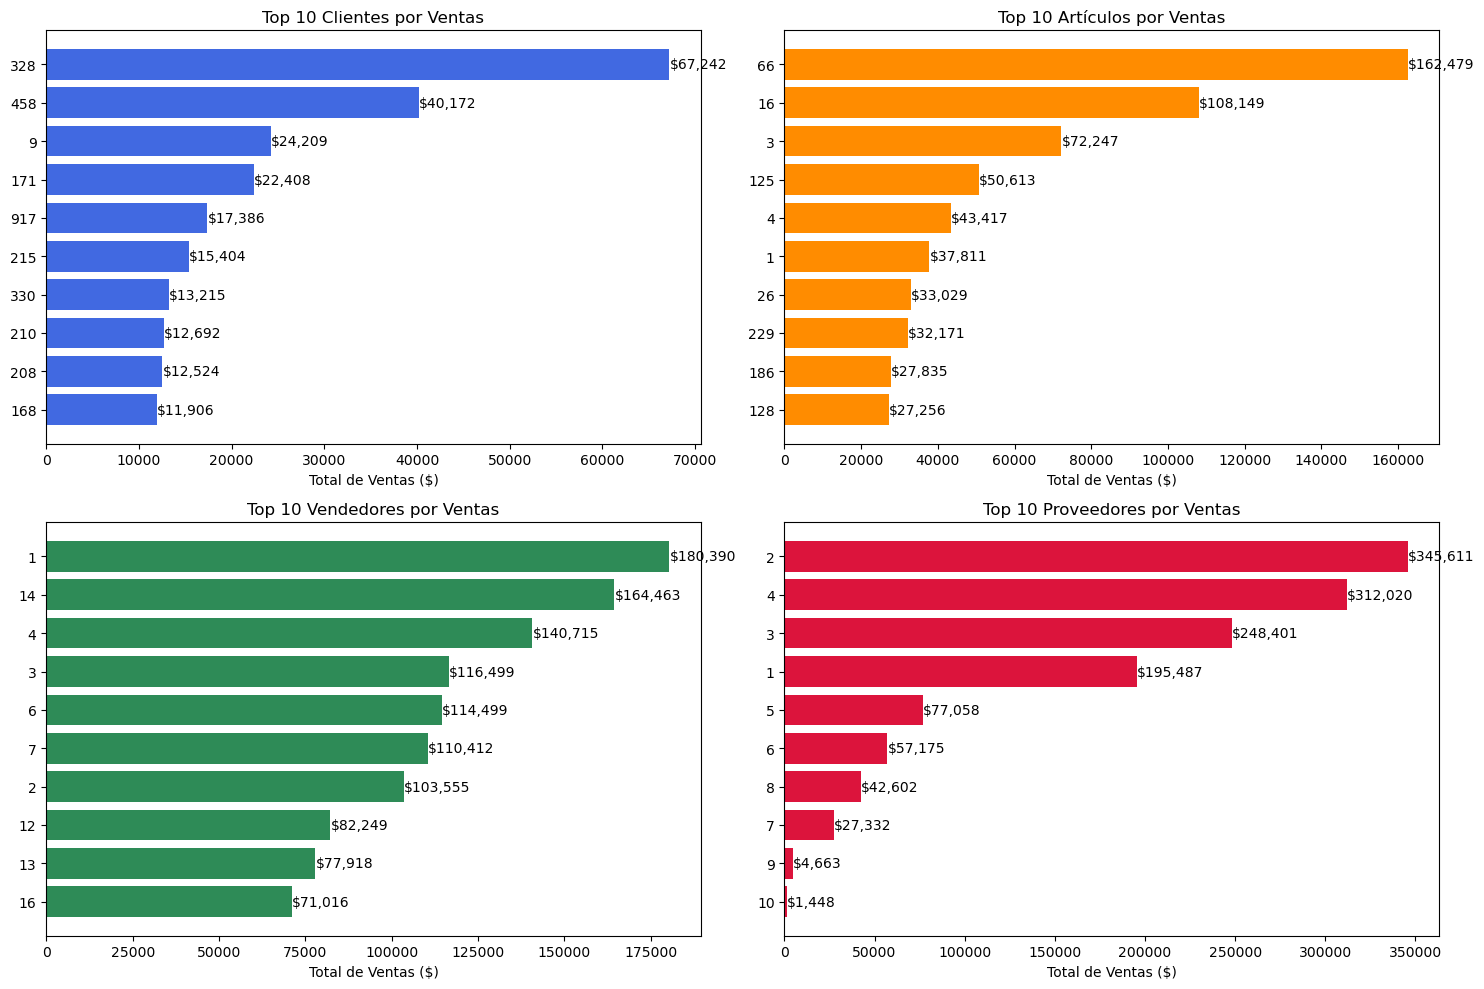

In [27]:
import matplotlib.pyplot as plt

# Obtener los Top 10 en cada categoría
top_clientes = df_ventas.groupby('CLIENTE')['TOTAL VENTA'].sum().nlargest(10)
top_articulos = df_ventas.groupby('ARTICULO')['TOTAL VENTA'].sum().nlargest(10)
top_vendedores = df_ventas.groupby('VENDEDOR')['TOTAL VENTA'].sum().nlargest(10)
top_proveedores = df_ventas.groupby('PROVEEDOR')['TOTAL VENTA'].sum().nlargest(10)

# Crear figura con 4 subgráficos (2x2)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Función para agregar etiquetas a las barras
def add_labels(bars, ax):
    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                f"${bar.get_width():,.0f}", ha='left', va='center', fontsize=10, color="black")

# Gráfico 1: Clientes
bars = axes[0, 0].barh(range(len(top_clientes)), top_clientes[::-1], color='royalblue')
axes[0, 0].set_yticks(range(len(top_clientes)))  # Ajustar posición de etiquetas
axes[0, 0].set_yticklabels(top_clientes.index[::-1])  # Agregar nombres correctos
axes[0, 0].set_title("Top 10 Clientes por Ventas", fontsize=12)
axes[0, 0].set_xlabel("Total de Ventas ($)")
add_labels(bars, axes[0, 0])

# Gráfico 2: Artículos
bars = axes[0, 1].barh(range(len(top_articulos)), top_articulos[::-1], color='darkorange')
axes[0, 1].set_yticks(range(len(top_articulos)))
axes[0, 1].set_yticklabels(top_articulos.index[::-1])
axes[0, 1].set_title("Top 10 Artículos por Ventas", fontsize=12)
axes[0, 1].set_xlabel("Total de Ventas ($)")
add_labels(bars, axes[0, 1])

# Gráfico 3: Vendedores
bars = axes[1, 0].barh(range(len(top_vendedores)), top_vendedores[::-1], color='seagreen')
axes[1, 0].set_yticks(range(len(top_vendedores)))
axes[1, 0].set_yticklabels(top_vendedores.index[::-1])
axes[1, 0].set_title("Top 10 Vendedores por Ventas", fontsize=12)
axes[1, 0].set_xlabel("Total de Ventas ($)")
add_labels(bars, axes[1, 0])

# Gráfico 4: Proveedores
bars = axes[1, 1].barh(range(len(top_proveedores)), top_proveedores[::-1], color='crimson')
axes[1, 1].set_yticks(range(len(top_proveedores)))
axes[1, 1].set_yticklabels(top_proveedores.index[::-1])
axes[1, 1].set_title("Top 10 Proveedores por Ventas", fontsize=12)
axes[1, 1].set_xlabel("Total de Ventas ($)")
add_labels(bars, axes[1, 1])

# Ajustar distribución de los gráficos
plt.tight_layout()
plt.show()


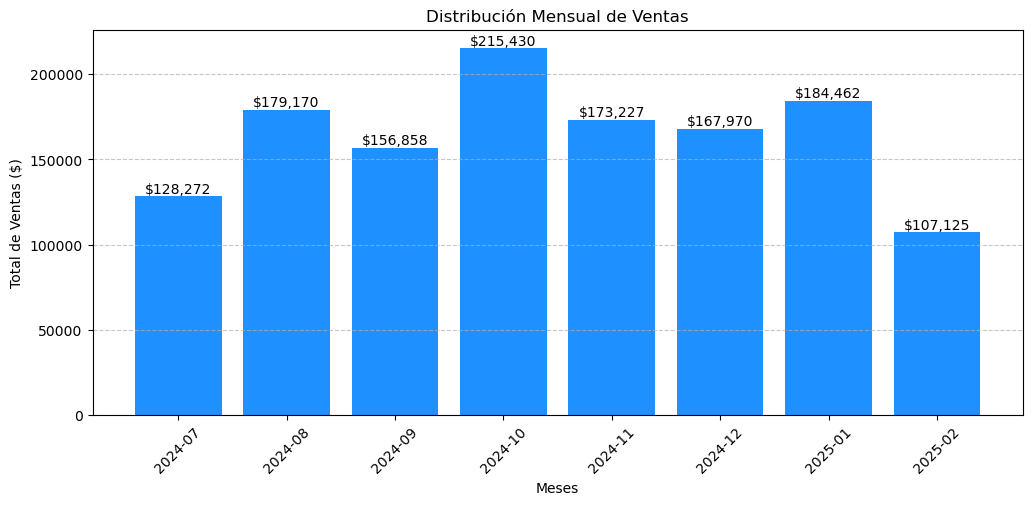

In [28]:
# Agrupar por mes y sumar las ventas
ventas_mensuales = df_ventas.groupby(df_ventas['FECHA'].dt.to_period('M'))['TOTAL VENTA'].sum()

# Convertir el índice a formato de cadena para el gráfico (meses en formato 'YYYY-MM')
meses = ventas_mensuales.index.strftime('%Y-%m')

# Crear la figura
plt.figure(figsize=(12, 5))

# Graficar las ventas mensuales
bars = plt.bar(meses, ventas_mensuales, color='dodgerblue')

# Añadir etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"${yval:,.0f}", ha="center", va="bottom", fontsize=10, color="black")

# Configurar el gráfico
plt.title("Distribución Mensual de Ventas")
plt.xlabel("Meses")
plt.ylabel("Total de Ventas ($)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

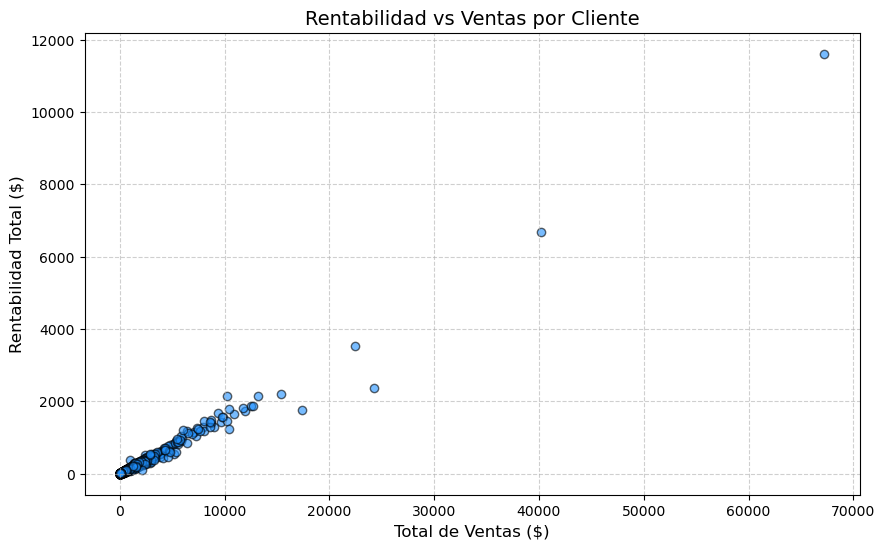

In [29]:
import matplotlib.pyplot as plt

# Agrupar clientes por ventas y rentabilidad total
df_clientes = df_ventas.groupby('CLIENTE').agg({
    'TOTAL VENTA': 'sum',  
    'RENTABILIDAD BRUTA': 'sum'  
}).reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(df_clientes['TOTAL VENTA'], df_clientes['RENTABILIDAD BRUTA'], alpha=0.6, color='dodgerblue', edgecolors='black')

# Configuración del gráfico
plt.title("Rentabilidad vs Ventas por Cliente", fontsize=14)
plt.xlabel("Total de Ventas ($)", fontsize=12)
plt.ylabel("Rentabilidad Total ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


In [30]:
# 1. Extraer las facturas únicas por CLIENTE para evitar repeticiones (cada factura se repite por producto)
df_facturas = df_ventas.drop_duplicates(subset=["CLIENTE", "FACTURA"])

# 2. Ordenar por CLIENTE y FECHA
df_facturas = df_facturas.sort_values(by=["CLIENTE", "FECHA"])

# 3. Calcular la diferencia de días entre facturas (compras) para cada cliente
df_facturas["DIFERENCIA_DIAS"] = df_facturas.groupby("CLIENTE")["FECHA"].diff().dt.days

# 4. Calcular la media de días entre compras y el conteo de diferencias (que es igual a compras - 1)
frecuencia_clientes = df_facturas.groupby("CLIENTE")["DIFERENCIA_DIAS"].agg(["mean", "count"]).reset_index()

# Renombrar columnas para mayor claridad
frecuencia_clientes.columns = ["CLIENTE", "MEDIA_DIAS_ENTRE_COMPRAS", "COUNT_DIFF"]

# 5. Calcular el total de compras sumando 1 al conteo de diferencias (ya que para 1 compra, count = 0)
frecuencia_clientes["TOTAL_COMPRAS"] = frecuencia_clientes["COUNT_DIFF"] + 1

# 6. Eliminar la columna auxiliar de diferencias
frecuencia_clientes.drop(columns=["COUNT_DIFF"], inplace=True)

# 7. Para clientes con una sola compra, MEDIA_DIAS_ENTRE_COMPRAS será NaN; se reemplaza por 0
frecuencia_clientes["MEDIA_DIAS_ENTRE_COMPRAS"].fillna(0, inplace=True)

frecuencia_clientes


,CLIENTE,MEDIA_DIAS_ENTRE_COMPRAS,TOTAL_COMPRAS
0,1,12.666667,19
1,2,15.142857,15
2,3,15.785714,15
3,4,12.555556,19
4,5,7.062500,33
...,...,...,...
1171,1172,0.000000,1
1172,1173,0.000000,1
1173,1174,0.000000,2
1174,1175,0.000000,1


In [31]:
frecuencia_clientes.describe()

,CLIENTE,MEDIA_DIAS_ENTRE_COMPRAS,TOTAL_COMPRAS
count,1176.000000,1176.000000,1176.000000
mean,588.500000,19.155171,9.201531
std,339.626265,20.349139,8.015689
min,1.000000,0.000000,1.000000
25%,294.750000,8.375962,3.000000
50%,588.500000,15.183333,7.000000
75%,882.250000,24.616667,13.000000
max,1176.000000,221.000000,46.000000


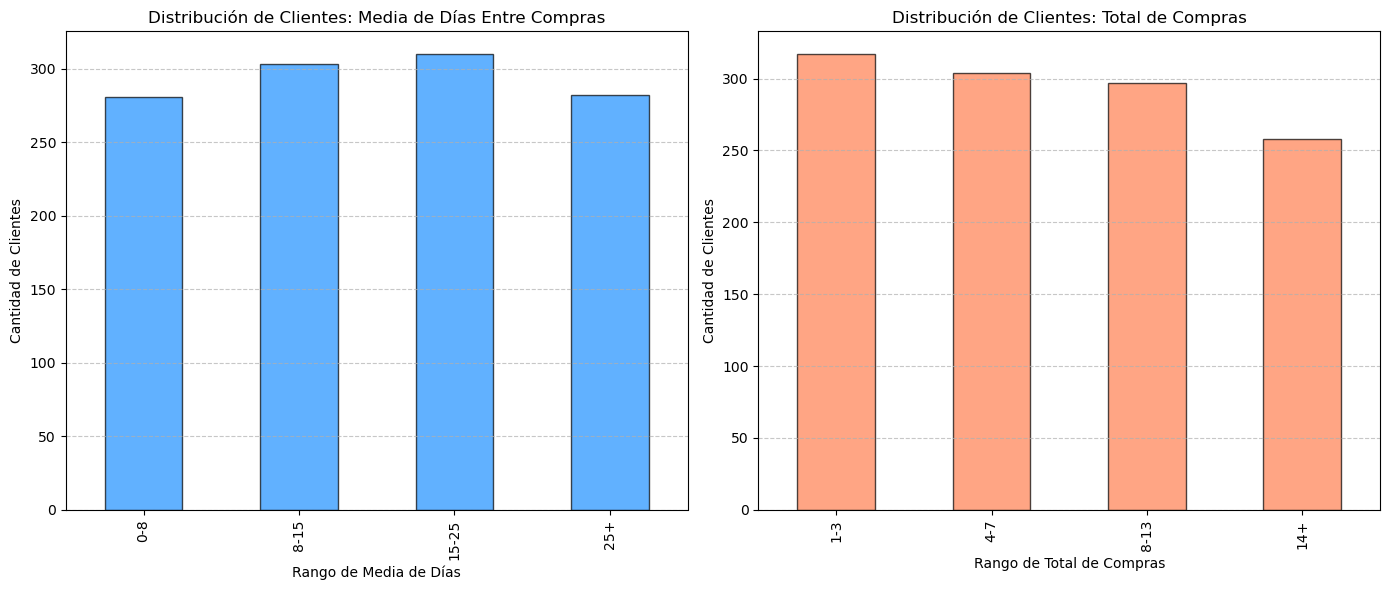

In [32]:
# Buckets para MEDIA_DIAS_ENTRE_COMPRAS
bins_media = [0, 8, 15, 25, np.inf]
labels_media = ["0-8", "8-15", "15-25", "25+"]
frecuencia_clientes["BUCKET_MEDIA"] = pd.cut(frecuencia_clientes["MEDIA_DIAS_ENTRE_COMPRAS"],
                                             bins=bins_media, labels=labels_media, include_lowest=True)

# Buckets para TOTAL_COMPRAS
bins_total = [0, 3, 7, 13, np.inf]
labels_total = ["1-3", "4-7", "8-13", "14+"]
frecuencia_clientes["BUCKET_TOTAL"] = pd.cut(frecuencia_clientes["TOTAL_COMPRAS"],
                                             bins=bins_total, labels=labels_total, include_lowest=True)

# Contar clientes en cada bucket
bucket_counts_media = frecuencia_clientes["BUCKET_MEDIA"].value_counts().sort_index()
bucket_counts_total = frecuencia_clientes["BUCKET_TOTAL"].value_counts().sort_index()

# Graficar ambos histogramas en un solo gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para MEDIA_DIAS_ENTRE_COMPRAS
bucket_counts_media.plot(kind="bar", color="dodgerblue", edgecolor="black", alpha=0.7, ax=axes[0])
axes[0].set_title("Distribución de Clientes: Media de Días Entre Compras")
axes[0].set_xlabel("Rango de Media de Días")
axes[0].set_ylabel("Cantidad de Clientes")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Gráfico para TOTAL_COMPRAS
bucket_counts_total.plot(kind="bar", color="coral", edgecolor="black", alpha=0.7, ax=axes[1])
axes[1].set_title("Distribución de Clientes: Total de Compras")
axes[1].set_xlabel("Rango de Total de Compras")
axes[1].set_ylabel("Cantidad de Clientes")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


In [33]:
# Clasificacion ABC de Clientes
ventas_clientes = df_ventas.groupby('CLIENTE')['TOTAL VENTA'].sum().sort_values(ascending=False).reset_index()

ventas_clientes['VENTAS ACUMULADAS %'] = ventas_clientes['TOTAL VENTA'].cumsum() / ventas_clientes['TOTAL VENTA'].sum() * 100

ventas_clientes['CATEGORIA'] = 'C'
ventas_clientes.loc[ventas_clientes['VENTAS ACUMULADAS %'] <= 70, 'CATEGORIA'] = 'A'
ventas_clientes.loc[(ventas_clientes['VENTAS ACUMULADAS %'] > 70) & (ventas_clientes['VENTAS ACUMULADAS %'] <= 90), 'CATEGORIA'] = 'B'

# Crear resumen del Análisis ABC
abc_summary = ventas_clientes.groupby('CATEGORIA').agg(
    Count_Clientes=('CLIENTE', 'count'),
    Total_Ventas_Cliente=('TOTAL VENTA', 'sum')
).reset_index()

# Calcular porcentaje de contribución
abc_summary['%CT'] = (abc_summary['Total_Ventas_Cliente'] / abc_summary['Total_Ventas_Cliente'].sum()) * 100

# Agregar fila de Totales
abc_summary = pd.concat([abc_summary, pd.DataFrame({
    'CATEGORIA': ['Total'],
    'Count_Clientes': [abc_summary['Count_Clientes'].sum()],
    'Total_Ventas_Cliente': [abc_summary['Total_Ventas_Cliente'].sum()],
    '%CT': [abc_summary['%CT'].sum()]
})], ignore_index=True)

# Formatear los valores numéricos
abc_summary['Total_Ventas_Cliente'] = abc_summary['Total_Ventas_Cliente'].apply(lambda x: f"{x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
abc_summary['%CT'] = abc_summary['%CT'].apply(lambda x: f"{x:,.2f}%")

print(abc_summary)


  CATEGORIA  Count_Clientes Total_Ventas_Cliente      %CT
0         A             198           917.574,44   69.91%
1         B             301           263.222,13   20.05%
2         C             677           131.715,91   10.04%
3     Total            1176         1.312.512,48  100.00%


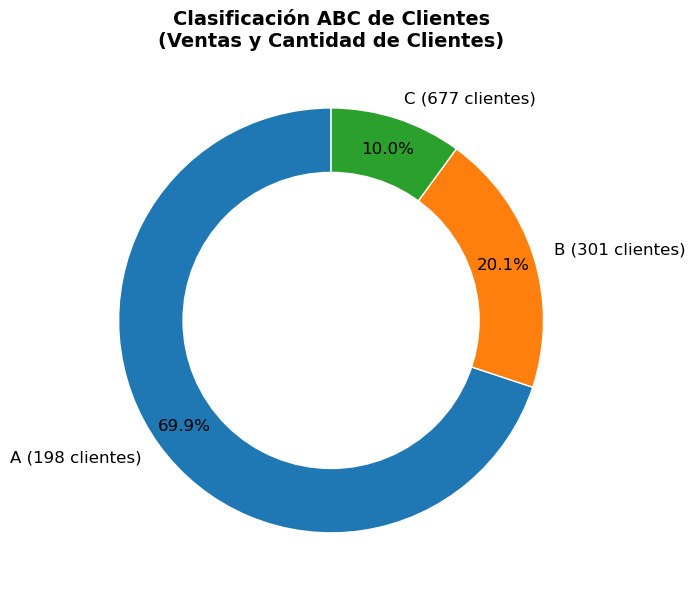

In [34]:
import matplotlib.pyplot as plt

# Filtrar la fila "Total" para no graficarla
abc_summary_filtered = abc_summary[abc_summary["CATEGORIA"] != "Total"].copy()

# Convertir columnas numéricas correctamente
abc_summary_filtered["Total_Ventas_Cliente"] = abc_summary_filtered["Total_Ventas_Cliente"].astype(str)
abc_summary_filtered["Total_Ventas_Cliente"] = abc_summary_filtered["Total_Ventas_Cliente"].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Crear etiquetas personalizadas con la cantidad de clientes por categoría
labels = [
    f"{row['CATEGORIA']} ({int(row['Count_Clientes'])} clientes)" 
    for _, row in abc_summary_filtered.iterrows()
]

# Crear el gráfico de anillo
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    abc_summary_filtered["Total_Ventas_Cliente"], 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    pctdistance=0.85, 
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 12}
)

# Dibujar un círculo en el centro para dar el efecto de anillo
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Formato del gráfico
ax.set_title("Clasificación ABC de Clientes\n(Ventas y Cantidad de Clientes)", fontsize=14, fontweight='bold')
plt.tight_layout()

# Mostrar la gráfica
plt.show()


# KMEANS CLIENTES

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34143 entries, 1 to 34143
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FECHA                34143 non-null  datetime64[ns]
 1   FACTURA              34143 non-null  float64       
 2   CLIENTE              34143 non-null  int64         
 3   VENDEDOR             34143 non-null  int64         
 4   ARTICULO             34143 non-null  int64         
 5   PROVEEDOR            34143 non-null  int64         
 6   CANTIDAD             34143 non-null  float64       
 7   UNIDAD DE VENTA      34143 non-null  object        
 8   PRECIO UNITARIO      34143 non-null  float64       
 9   TOTAL VENTA          34143 non-null  float64       
 10  COSTO UNITARIO       34143 non-null  float64       
 11  COSTO TOTAL          34143 non-null  float64       
 12  RENTABILIDAD BRUTA   34143 non-null  float64       
 13  MARGEN RENTABILIDAD  34143 non-null 

In [36]:
# Agregar estos valores al dataframe de clientes
df_clientes = df_ventas.groupby("CLIENTE").agg(
    venta_total=("TOTAL VENTA", "sum"),
    frecuencia_venta= ('FACTURA', 'nunique'),
    num_articulos_diferentes=("ARTICULO", "nunique"),
    num_proveedores_diferentes=("PROVEEDOR", "nunique"),
    ganancia_promedio=("MARGEN RENTABILIDAD", "mean"),
    factura_promedio=("TOTAL VENTA", "mean"),
    productos_distintos_comprados=("ARTICULO", "count"),
    cantidad_total_comprada=("CANTIDAD", "sum"),
    cantidad_promedio_por_compra=("CANTIDAD", "mean"),
).reset_index()

# Hago el mergue de media de entre y compras y la clasificacion ABC 
df_clientes = (
    df_clientes
    .merge(frecuencia_clientes[["CLIENTE", "MEDIA_DIAS_ENTRE_COMPRAS"]], on="CLIENTE", how="left")
)


df_clientes.head()


,CLIENTE,venta_total,frecuencia_venta,num_articulos_diferentes,num_proveedores_diferentes,ganancia_promedio,factura_promedio,productos_distintos_comprados,cantidad_total_comprada,cantidad_promedio_por_compra,MEDIA_DIAS_ENTRE_COMPRAS
0,1,2432.21,19,24,6,19.902051,52.874130,46,101.25,2.201087,12.666667
1,2,3854.84,15,47,4,16.283513,23.795309,162,141.25,0.871914,15.142857
2,3,430.81,15,13,4,16.345562,13.462813,32,23.25,0.726562,15.785714
3,4,2836.70,19,33,7,15.951504,30.177660,94,104.00,1.106383,12.555556
4,5,6442.22,33,88,8,17.566114,41.832597,154,378.50,2.457792,7.062500


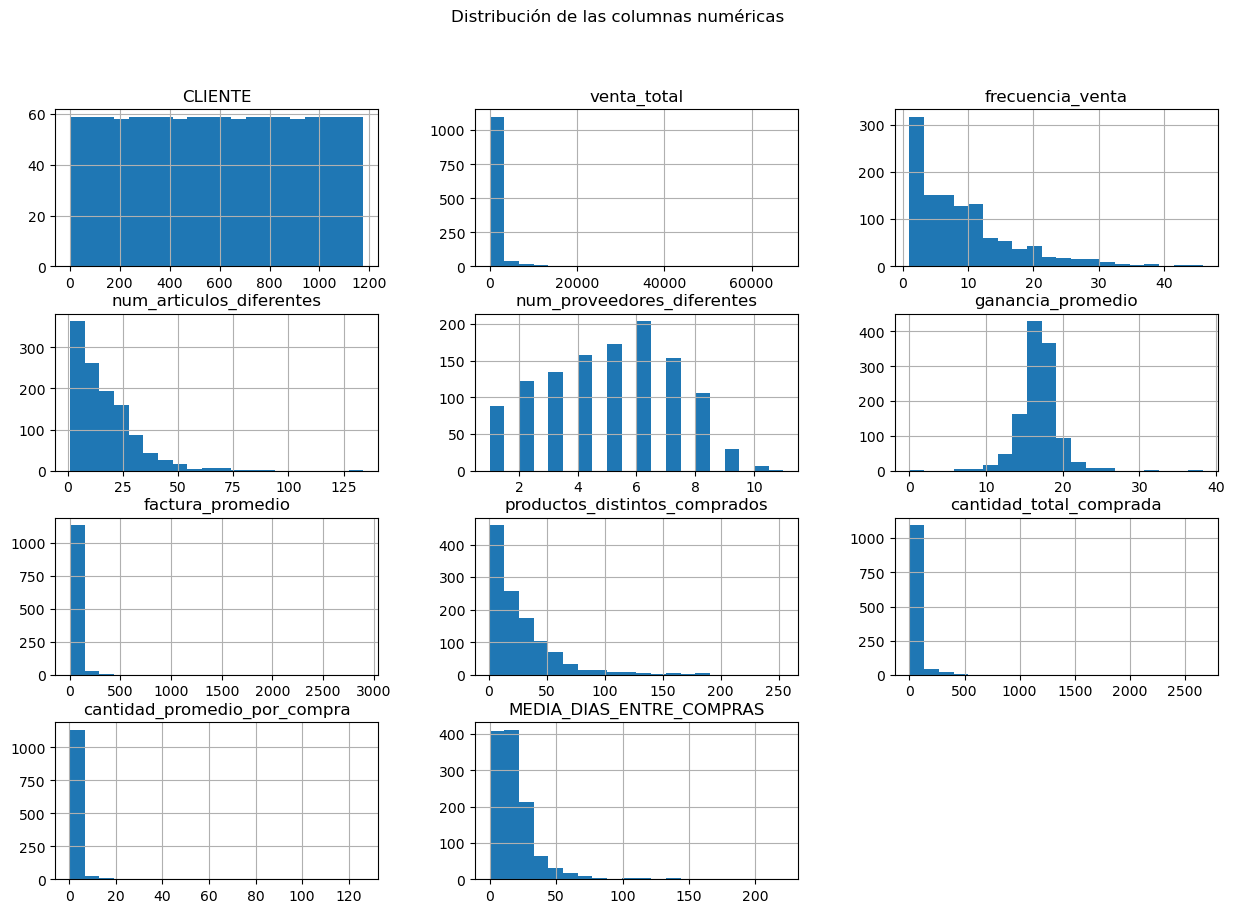

In [37]:
# Veo las distribuciones para ver donde aplicar logaritmo

# Seleccionar solo las columnas numéricas
columnas_numericas = df_clientes.select_dtypes(include=['int64', 'float64'])

# Crear histogramas para cada columna numérica
columnas_numericas.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribución de las columnas numéricas")  
plt.show() 


In [38]:
# Aplicar log a las columnas con fuerte asimetría
df_clientes["venta_total_log"] = np.log1p(df_clientes["venta_total"])
df_clientes["factura_promedio_log"] = np.log1p(df_clientes["factura_promedio"])
df_clientes["cantidad_total_comprada_log"] = np.log1p(df_clientes["cantidad_total_comprada"])
df_clientes["cantidad_promedio_por_compra_log"] = np.log1p(df_clientes["cantidad_promedio_por_compra"])
df_clientes["frecuencia_venta_log"] = np.log1p(df_clientes["frecuencia_venta"])
df_clientes["num_articulos_diferentes_log"] = np.log1p(df_clientes["num_articulos_diferentes"])
df_clientes["productos_distintos_comprados_log"] = np.log1p(df_clientes["productos_distintos_comprados"])
df_clientes["MEDIA_DIAS_ENTRE_COMPRAS_log"] = np.log1p(df_clientes["MEDIA_DIAS_ENTRE_COMPRAS"])


In [39]:
# Seleccionamos las features para el algoritmo

features = [
    "venta_total_log",      
    "factura_promedio_log",
    "cantidad_total_comprada_log",
    #"cantidad_promedio_por_compra_log", # Correlacion alta
    'frecuencia_venta_log',
    "num_articulos_diferentes_log",
    #"productos_distintos_comprados_log", # Correlacion alta
    "MEDIA_DIAS_ENTRE_COMPRAS_log",     
    #"num_proveedores_diferentes",   # Sin importancia
    #"ganancia_promedio",             # Correlacion alta
]

# Extraer la matriz de features
X = df_clientes[features].values

# Escalar las variables para que todas tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


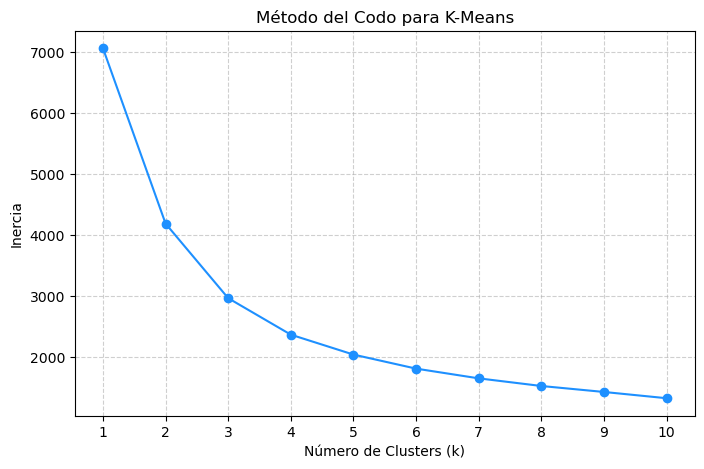

In [40]:
from threadpoolctl import threadpool_limits
# Método del codo para determinar el número óptimo de clusters
threadpool_limits(limits=1)  
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='dodgerblue')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo para K-Means")
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [41]:
# Aplico K-Means con el número óptimo de clusters ( k = 4)
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la columna de clusters al DataFrame original
df_clientes["Cluster"] = clusters

In [42]:
# Verificamos las metricas de los cluster
cluster_resumen = df_clientes.groupby("Cluster").agg(
    cantidad_clientes=('CLIENTE','count'),
    venta_total=('venta_total','sum'),
    promedio_compras_frecuencia= ('frecuencia_venta', 'mean'),
    factura_promedio=('factura_promedio', 'mean'),
    num_articulos_diferentes=("num_articulos_diferentes", "nunique"),
  ).round(2)

cluster_resumen


,cantidad_clientes,venta_total,promedio_compras_frecuencia,factura_promedio,num_articulos_diferentes
Cluster,,,,,
0,177,20107.87,1.33,33.36,18
1,449,339290.02,12.84,19.73,53
2,358,66584.56,4.68,18.97,18
3,192,886530.03,16.39,122.75,64


In [43]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.3198


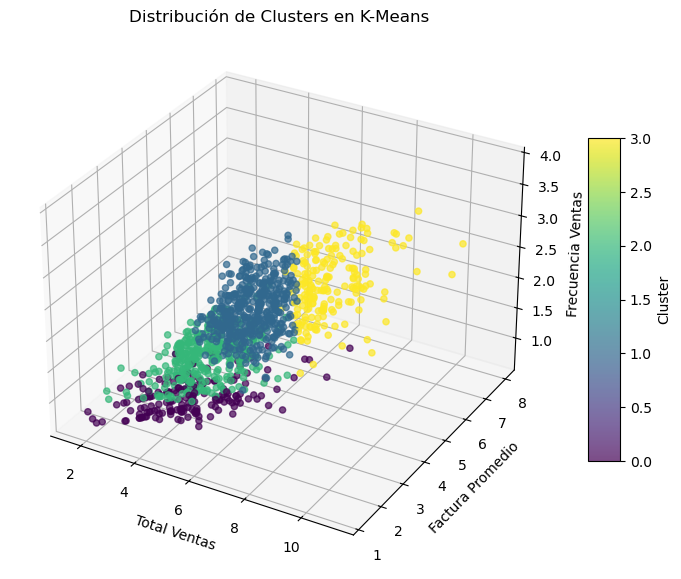

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Seleccionar tres características para la visualización en 3D
features_3d = ['venta_total_log', 'factura_promedio_log', 'frecuencia_venta_log']

X_3d = df_clientes[features_3d].values

# Crear una figura en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores a cada cluster
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], 
                     c=df_clientes['Cluster'], cmap='viridis', alpha=0.7)

# Etiquetas de los ejes
ax.set_xlabel('Total Ventas')
ax.set_ylabel('Factura Promedio')
ax.set_zlabel('Frecuencia Ventas')
ax.set_title('Distribución de Clusters en K-Means')

# Agregar una barra de colores para indicar los clusters
legend1 = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=10)
legend1.set_label('Cluster')

# Guardar la imagen en un archivo
plt.savefig('clusters_3d.png', dpi=300, bbox_inches='tight')  # Guardar como PNG

plt.show()

## Estrategias de Ventas y Promoción por Segmento de Clientes

### **Cluster 0: Fidelización, Cross-Selling y Suscripción**
Este grupo está compuesto por clientes frecuentes con un ticket de compra bajo. Aunque generan un volumen significativo, el impacto en ingresos es moderado. Para mejorar la rentabilidad de este segmento, es importante incentivar compras más grandes y mejorar la retención mediante programas de fidelización y recomendaciones personalizadas.

---

### **Cluster 1: Programas VIP, Descuentos por Volumen y Financiamiento**
Los clientes en este segmento representan una parte importante de las ventas totales, con un alto ticket promedio y una variedad amplia de productos comprados. Sin embargo, su frecuencia de compra es menor, lo que indica una oportunidad para fortalecer la relación con beneficios exclusivos y financiamiento para compras grandes.

---

### **Cluster 2: Reactivación, Promociones Urgentes y Remarketing**
Este segmento se compone de clientes ocasionales con baja frecuencia de compra y ticket promedio bajo. Es fundamental implementar estrategias de reactivación para aumentar la recurrencia y convertirlos en compradores habituales. Además, el remarketing puede recordarles productos previamente adquiridos y generar incentivos de recompra.

---

### **Cluster 3: Incentivos por Volumen, Recompensas por Frecuencia y Packs Promocionales**
Este grupo compra con más frecuencia que el Cluster 2, pero con un ticket de compra bajo. Su comportamiento sugiere que pueden ser pequeños negocios o consumidores finales que realizan compras en pequeñas cantidades. Las estrategias deben enfocarse en incentivar compras de mayor volumen mediante promociones y programas de recompensas para fidelizar a estos clientes